In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from astropy import constants as const
from astropy import units as u
import math
from astropy.constants import c, L_sun, sigma_sb, M_jup, M_earth

In [6]:
try:
    data = pd.read_csv('/home/anibal/Downloads/things/df_trilegal_radios.csv')
except:
    Radii_star = []
    for i in tqdm(range(len(data))):
        logL = data['logL'][i]  # log10 of the luminosity in Lsun from TRILEGAL
        logTe = data['logTe'][i]  # log10 of effective temperature in K from TRILEGAL
        L_star = 10**(logL)
        Teff = (10**(logTe))*u.K
        top = L_star*L_sun
        sigma = sigma_sb
        bot = 4*np.pi*sigma*Teff**4
        Rstar = np.sqrt(top/bot)
        Radii_star.append(Rstar.to('R_sun').value)

    data['radius']=Radii_star
    df_koshimoto_large = pd.read_csv('/home/anibal/genulens/tmp_new.dat', delim_whitespace=True, comment='#', header=None)
    header = ["wtj", "M_L", "D_L", "D_S", "tE", "thetaE", "piE", "piEN", "piEE", "mu_rel", "muSl", "muSb", "i_L", "iS",
              "iL", "fREM"]
    df_koshimoto_large.columns = header
    data["D_S"]=df_koshimoto_large["D_S"]
    data["D_L"]=df_koshimoto_large["D_L"]
    data["mu_rel"]=df_koshimoto_large["mu_rel"]

    data = data[['u','g','r','i','z','Y','W149','radius','D_S','D_L','mu_rel']]
    data = data[data['D_S']<8000]
    data.to_csv('/home/anibal/Downloads/df_trilegal_radios.csv', index=False)
    

print('The len() of the database is: ',len(data))
data.head()

The len() of the database is:  6752296


,u,g,r,i,z,Y,W149,radius,D_S,D_L,mu_rel
0,27.940,25.112,23.791,23.052,22.687,22.509,22.4888,0.204717,7708,3337,1.752341
1,32.152,28.801,27.358,25.353,24.371,23.905,23.7048,0.256539,5443,3490,3.368060
2,29.916,26.583,25.143,23.976,23.416,23.174,23.0758,0.377705,7715,4581,6.920123
3,19.718,18.786,18.695,18.736,18.808,18.839,19.3448,1.236383,6055,2758,9.626590
4,28.293,25.580,24.286,23.587,23.239,23.064,23.0568,0.232088,7359,6834,6.344430


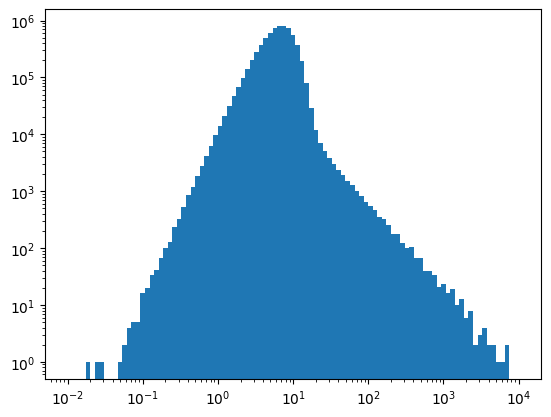

In [15]:
plt.hist(data['mu_rel'],bins=np.logspace(-2,4,100))
plt.xscale("log")
plt.yscale("log")

In [4]:
200*200

40000

In [5]:
# (20-min(data['radius']))/delta

In [6]:

# h = 300
# delta = (20 - min(data['radius'])) / h


In [7]:
# int(40000/300)
# int(large_df/h)
# delta

In [3]:
# Define the step size
h = 100
delta = (20 - min(data['radius'])) / h

# Initialize an empty list to store the chunks
chunks_list = []

large_df = 20000
# Loop to generate and store chunks
for n in tqdm(range(1, h + 1)):
    interval = (min(data['radius']) + (n-1) * delta, min(data['radius']) + n * delta)
    chunk = data[(data['radius'] > interval[0]) & (data['radius'] <= interval[1])].head(int(large_df/h))
    chunks_list.append(chunk)

# Concatenate the list of DataFrames into a single DataFrame outside the loop
chunked_df = pd.concat(chunks_list).reset_index(drop=True)

print(chunked_df)

KeyboardInterrupt: 

In [9]:
# plt.hist(chunked_df['radius'], bins=np.arange(0,20,0.2))
# plt.show()

In [10]:
# delta = (20-min(data['radius']))/100
# chunks_list=[]
# for n in tqdm(range(1,101)):
#     interval = (min(data['radius'])+(n-1)*delta ,min(data['radius'])+n*delta)
#     chunks_list.append(data[(min(data['radius'])<interval[0])&(interval[1]>data['radius'])].head(400))
#     chunked_df = pd.concat(chunks_list).reset_index(drop=True)

# plt.hist(chunked_df['radius'],bins=np.arange(0,20,0.1))
# plt.yscale('log')

In [5]:
data = chunked_df
ang_radii_E = []
radii_source = []
tstart_Roman = 2461508.763828608

dict_micro = {'t0': [],'te': [],'u0': [],'rho': [],'piEE': [],'piEN': [], 'theta_E':[],'theta_s':[],'M':[]}
for i in tqdm(range(len(data))):
    ml = np.random.uniform(1 * u.M_earth.to('M_sun'), 13 * u.M_jup.to('M_sun'))
    ml = ml*u.M_sun
    # print(ml.to('M_earth'))
    DS = (data.iloc[i]['D_S'] * u.pc).to('kpc')
    DL = (data.iloc[i]['D_L'] * u.pc).to('kpc')
    c = const.c
    G = const.G
    yr2day = 365.25
    pi_rel = ((1 / DL) - (1 / DS))
    k = 4 * G / (c ** 2)
    aconv = (180 * 60 * 60 * 1000) / math.pi
    theta_E = ((np.sqrt(k * pi_rel * ml))*u.rad.to('uas')).decompose()
    mu_rel = data.iloc[i]['mu_rel']
    tE = float((theta_E/(mu_rel*1000))*yr2day)
    piE = float(pi_rel.value/theta_E)
    # ang_radii_E.append(theta_E)
    Rstar = data['radius'].iloc[i]*u.R_sun
    theta_s = (np.arctan(Rstar/DS).decompose()).to('uas')
    radii_source.append(theta_s)
    #------------------------------------------------------------------------------------------------
    # t0 = np.random.uniform(tstart_Roman,
                           # tstart_Roman + 5 * 365)  # from 100 day before Roman is launched to one year later
    u0 = np.random.uniform(0, 3)
    rho = float((theta_s/theta_E).value)
    phi = np.random.uniform(0, np.pi)
    piEE = piE * np.cos(phi)
    piEN = piE * np.sin(phi)
    t0 = np.random.uniform(tstart_Roman, tstart_Roman + 5 * 365)
    dict_micro['u0'].append(u0)
    dict_micro['te'].append(tE)
    dict_micro['rho'].append(rho)
    dict_micro['piEE'].append(piEE)
    dict_micro['piEN'].append(piEN)
    dict_micro['t0'].append(t0)
    dict_micro['theta_E'].append(theta_E.value)
    dict_micro['theta_s'].append(theta_s.value)
    dict_micro['M'].append(ml.to('M_jup'))


NameError: name 'chunked_df' is not defined

In [12]:
# data = data.head(int(4e+4))

In [13]:
for key in dict_micro:
    data[key] = dict_micro[key]
data.head()

,u,g,r,i,z,Y,W149,radius,D_S,D_L,mu_rel,t0,te,u0,rho,piEE,piEN,theta_E,theta_s,M
0,32.301,29.220,27.113,24.495,22.827,21.965,21.2038,0.186704,7825,7574,10.674270,2.462985e+06,0.322183,0.006269,0.011785,0.000116,0.000435,9.415651,0.110960,2.692699627669436 jupiterMass
1,32.227,28.867,27.281,24.722,23.249,22.512,22.1068,0.196179,7904,7617,5.901980,2.463116e+06,0.543886,2.197145,0.013134,-0.000409,0.000356,8.788505,0.115426,2.084156364898913 jupiterMass
2,30.983,27.616,26.127,23.634,22.244,21.552,21.2058,0.196405,7953,6628,9.954552,2.461926e+06,1.435852,1.246748,0.002935,0.000135,0.000628,39.132819,0.114847,7.836662195753649 jupiterMass
3,32.146,28.835,27.420,25.085,23.836,23.220,22.9468,0.201212,7223,7101,8.432836,2.461978e+06,0.631033,1.018051,0.008892,0.000042,0.000158,14.569192,0.129548,11.478879577880164 jupiterMass
4,32.195,28.837,27.120,24.495,22.935,22.151,21.6768,0.189956,6878,2661,7.117403,2.463225e+06,7.460195,0.587427,0.000883,-0.000601,0.001467,145.372258,0.128436,11.798254779360356 jupiterMass


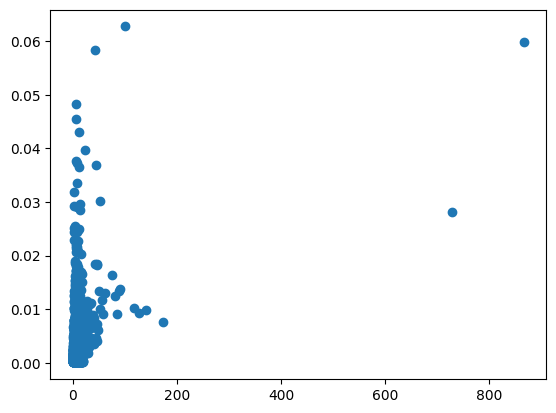

In [25]:
plt.plot(data['mu_rel'], np.sqrt(data['piEE']**2+data['piEN']**2), marker='o',ls='')
# plt.xscale('log')
# plt.yscale('log')

In [6]:
df = pd.DataFrame()
for key in dict_micro:
    df[key] = dict_micro[key]
# df.head()

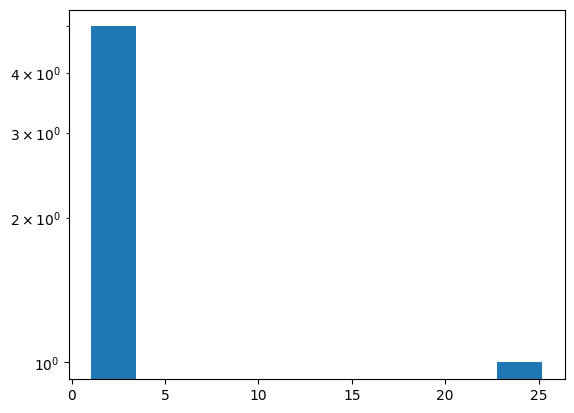

In [7]:
plt.hist(df['rho'][df['rho']>1])
plt.yscale('log')

In [8]:
# data.to_csv('/home/anibal/Downloads/df_trilegal_parameters.csv', index=False)

In [9]:
# data.head()
# type(data['te'].values[0])
# plt.hist(data['te'].values, range=(0, 20))

# # plt.hist(data['te'])
# plt.yscale('log')

In [10]:
import pandas as pd
data = pd.read_csv('/home/anibal/Downloads/df_trilegal_parameters.csv')
data.head()
# print(len(data))

FileNotFoundError: [Errno 2] No such file or directory: '/home/anibal/Downloads/df_trilegal_parameters.csv'

In [ ]:
len(data['rho'][(data['rho']<1*data['u0'])&(data['rho']>0.1*data['u0'])])

In [ ]:
# np.logspace(-3,1,4)
plt.hist2d(data['te'][(data['rho']<1*data['u0'])&(data['rho']>0.1*data['u0'])],np.sqrt(data['piEE'][(data['rho']<1*data['u0'])&(data['rho']>0.1*data['u0'])]**2+data['piEE'][(data['rho']<1*data['u0'])&(data['rho']>0.1*data['u0'])]**2),bins=(np.logspace(-2,1.5,20),np.logspace(-2,1.5,20)),cmap=plt.cm.BuPu)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$t_E \ [days]$', fontsize=20)
plt.ylabel(r'$\pi_E$', fontsize=20)
plt.colorbar()
plt.show()

In [ ]:
# plt.hist()data['rho'][(data['rho']<1*data['u0'])&(data['rho']>0.1*data['u0'])]

In [ ]:
# print(len(data['rho'][(data['rho']<1*data['u0'])&(data['rho']>0.1*data['u0'])]))
plt.hist2d(data['u0'][(data['rho']<1*data['u0'])&(data['rho']>0.1*data['u0'])], data['rho'][(data['rho']<1*data['u0'])&(data['rho']>0.1*data['u0'])],
           bins=(np.logspace(-3,1,20),np.logspace(-3,0.6,20)),cmap=plt.cm.BuPu)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\rho$', fontsize=20)
plt.ylabel(r'$u_0$', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.colorbar()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filter out non-finite values from data['rho']
valid_rho = data[np.isfinite(data['rho'])]
# display(valid_rho['u0'])
# # Filter out NaN values from data['u0']
# valid_u0 = data['u0'].dropna()

# # Filter out values greater than u0
# valid_rho = valid_rho[valid_rho > valid_u0.values]

# # Plot the histogram
# print(len(valid_rho['rho'][valid_rho['rho']>valid_rho['u0']]))
# print(len(valid_rho['rho'][(valid_rho['rho']<100*valid_rho['u0'])&(valid_rho['rho']>0.1*valid_rho['u0'])])*100/len(valid_rho))
# print(len(valid_rho['rho'][valid_rho['rho']<100*valid_rho['u0']])*100/len(valid_rho))
print(len(valid_rho['rho'][(valid_rho['rho']<100*valid_rho['u0'])&(valid_rho['rho']>0.1*valid_rho['u0'])]))
print('FSPL cases',len(valid_rho['rho'][(valid_rho['rho']<100*valid_rho['u0'])&(valid_rho['rho']>0.1*valid_rho['u0'])])*100/len(valid_rho['rho']))
# plt.hist(valid_rho['rho'][(valid_rho['rho']<100*valid_rho['u0'])&(valid_rho['rho']>0.1*valid_rho['u0'])], bins=np.arange(0,0.5,0.01))
# plt.hist(valid_rho['u0'][(valid_rho['rho']<100*valid_rho['u0'])&(valid_rho['rho']>0.1*valid_rho['u0'])], bins=np.arange(0,3.5,0.5))
plt.hist(valid_rho['rho'][(valid_rho['rho']<100*valid_rho['u0'])&(valid_rho['rho']>0.1*valid_rho['u0'])], bins=np.arange(0,5,0.5))
plt.yscale('log')
plt.show()



In [ ]:
fs_effects = valid_rho[(valid_rho['rho']<1*valid_rho['u0'])&(valid_rho['rho']>0.1*valid_rho['u0'])]
print(len(fs_effects))

In [ ]:
# data_params = data[['u', 'g' ,'r' ,'i' ,'z', 'Y', 'W149',	't0',	'te',	'u0',	'rho',	'piEE', 'piEN']]

In [ ]:
fs_effects.to_csv('/home/anibal/Downloads/parameters_fs_effect.csv', index=False)

In [ ]:
# import pandas as pd
# data_nueva = pd.read_csv('/home/anibal/Downloads/parameters_ffp.csv',sep=',', decimal='.', header=[0])
# data_nueva

In [ ]:
# print(844037*8)
# print(len(data_nueva))

In [ ]:
# data_nueva.iloc[106]
# import pandas as pd
# import numpy as np
# Create a sample DataFrame (replace this with your actual DataFrame)
# data = {'Column1': range(100), 'Column2': range(100, 200)}
# df = pd.DataFrame(data_nueva)
# Split the DataFrame into 8 pieces
# num_splits = 8
# df_splits = np.array_split(data, num_splits)
# # Access each split DataFrame
# for i, df_split in enumerate(df_splits):
#     csv_filename = f'/home/anibal/Downloads/parameters_split_{i + 1}.csv'
#     df_split.to_csv(csv_filename, index=False)
#     print(f"Split {i + 1} saved to {csv_filename}")

In [14]:
len(data)/4

4382.0

In [15]:
import pandas as pd
# Calculate the number of rows in each split
rows_per_split = 4382
num_splits = len(data) // rows_per_split
# Split the DataFrame into 8 pieces with approximately 5000 rows each
df_splits = [data.iloc[i * rows_per_split:(i + 1) * rows_per_split] for i in range(num_splits)]
# Save each split DataFrame to a CSV file
j = 0
for i, df_split in enumerate(df_splits):
    csv_filename = f'/home/anibal/results_roman_rubin/FFP_uni_split_{i + 1}.csv'
    df_split.to_csv(csv_filename, index=False)
    print(f"Split {i + 1} saved to {csv_filename}")
    j = j+1
    if j>8:
        break

Split 1 saved to /home/anibal/results_roman_rubin/FFP_uni_split_1.csv
Split 2 saved to /home/anibal/results_roman_rubin/FFP_uni_split_2.csv
Split 3 saved to /home/anibal/results_roman_rubin/FFP_uni_split_3.csv
Split 4 saved to /home/anibal/results_roman_rubin/FFP_uni_split_4.csv


In [ ]:
split_data = pd.read_csv('/home/anibal/results_roman_rubin/split_2.csv', sep=',', decimal='.')
display(split_data)
plt.hist(split_data['u0'])

In [ ]:
data[['D_L']].iloc[2]/1000
data[['D_S']].iloc[2]/1000

In [ ]:
# type(300 * u.M_earth.to('M_sun'))

In [ ]:
# ml = np.random.uniform(1 * u.M_earth.to('M_sun'), 13 * u.M_jup.to('M_sun'))
# ml = ml*u.M_sun
j=108
ml = 300 * u.M_earth.to('M_sun')*u.M_sun
# print(ml.to('M_earth'))
DS = ((data[['D_S']].iloc[j]/1000).values)*u.kpc#(data.iloc[i]['D_S'] * u.pc).to('kpc')
DL = ((data[['D_L']].iloc[j]/1000).values)*u.kpc#(data.iloc[i]['D_L'] * u.pc).to('kpc')
c = const.c
G = const.G
yr2day = 365.25
pi_rel = ((1 / DL) - (1 / DS))
k = 4 * G / (c ** 2)
aconv = (180 * 60 * 60 * 1000) / math.pi
theta_E = (np.sqrt(k * pi_rel * ml))*u.rad.to('uas')#aconv*1000#u.rad.to('mas')
print(theta_E.decompose())

In [ ]:
data = pd.read_csv('/home/anibal/Downloads/parameters_fs_effect.csv')

In [ ]:
len(data[(data['rho']>0.1*data['u0'])&(data['rho']<100*data['u0'])])
len(data)

In [ ]:
for i in range(8):
    csv_filename = f'/home/anibal/results_roman_rubin/FFP_fs_split_{i + 1}.csv'
    data = pd.read_csv(csv_filename)
    print(len(data[(data['rho']>0.1*data['u0'])&(data['rho']<100*data['u0'])]))

In [ ]:
a = 0
for i in range(1,9):
    data = pd.read_csv(f'/home/anibal/results_roman_rubin/FFP_fs_split_{i}.csv')
    a += len(data['rho'][data['rho']>1])
print(a)